In [ ]:
# import dependencies and load the data

In [1]:
import os
from numpy.random import seed
from tensorflow import set_random_seed

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [16]:
import numpy as np
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing import image

Using TensorFlow backend.


In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# make sure that the pictures for tests are in the same directory as the jupyter notebook file cuz otherwise the script doesnt work. folders val/normal/imagename
## enter your kaggle details to download the data

In [2]:
os.environ['KAGGLE_USERNAME'] = "kamkad"
os.environ['KAGGLE_KEY'] = "0000000000000000000000000000000"

seed(100)
set_random_seed(100)

In [46]:
def displaytrainingprogress(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#f98787')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [6]:
%time !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia 

100%|█████████████████████████████████████▉| 2.29G/2.29G [05:33<00:00, 6.24MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [05:33<00:00, 7.39MB/s]
CPU times: user 7.62 s, sys: 2.26 s, total: 9.89 s
Wall time: 5min 35s


In [7]:
%time !unzip chest-xray-pneumonia.zip #10 seconds

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0196-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0198-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0199-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0201-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0206-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0207-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0210-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0213-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0217-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0219-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0221-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMA

  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_475.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_477.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_478.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_479.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_480.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_481.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person101_bacteria_483.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person101_bacteria_484.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person101_bacteria_485.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person101_bacteria_486.jpeg  

  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person152_bacteria_722.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person152_bacteria_723.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person152_bacteria_724.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person153_bacteria_725.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person153_bacteria_726.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person154_bacteria_728.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person155_bacteria_729.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person155_bacteria_730.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person155_bacteria_731.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person157_bacteria_735.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person157_bacteria_739.jpeg  

  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person60_virus_117.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person61_virus_118.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person62_virus_119.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person63_virus_121.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person64_virus_122.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person65_virus_123.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person66_virus_125.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person67_virus_126.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person69_virus_129.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person70_virus_130.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person71_virus_131.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0206-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0207-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0209-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0210-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0211-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0213-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0214-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0215-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0216-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0217-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0218-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0219-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NO

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0435-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0437-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0437-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0437-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0438-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0439-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0439-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0439-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0440-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0441-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0442-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0444-0001.jpeg  
  inflating: chest_xray/__MACOSX

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0533-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0533-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0534-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0535-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0536-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0537-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0538-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0539-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0539-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0539-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0540-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0541-0001.jpeg  
  inflating: chest_xray/__MACOSX/ches

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0391-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0392-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0393-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0394-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0395-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0395-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0395-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0396-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0397-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0399-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0401-0001.jpeg  
  inflating: chest_xray/__MACOSX/

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0609-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0611-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0616-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0617-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0618-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0619-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0620-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0621-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0622-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0623-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0626-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0993-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0994-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0995-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0995-0001-0002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0995-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0997-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0998-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0999-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1002-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1004-0001.jpeg  
  inflating: chest_xray/__MACOSX/

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1175-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1176-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1177-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1178-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1179-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1180-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1181-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1182-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1183-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1184-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1185-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1379-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1385-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1396-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1400-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1401-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1406-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1412-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1419-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1422-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1423-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMO

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1066_virus_1769.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1067_bacteria_3001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1067_virus_1770.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1068_bacteria_3002.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1068_virus_1771.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1069_bacteria_3003.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1069_virus_1772.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person106_virus_194.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1070_virus_1773.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1071_bacteria_3005.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1071_virus_1

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person115_virus_219.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1160_bacteria_3105.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1160_virus_1947.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1161_virus_1948.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1162_bacteria_3107.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1162_virus_1949.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1162_virus_1950.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1163_virus_1951.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1164_bacteria_3110.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1164_virus_1952.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1164_virus_1955

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1238_virus_2098.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1239_bacteria_3195.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1239_virus_2099.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person123_virus_230.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1240_bacteria_3196.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1241_bacteria_3197.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1241_virus_2106.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1242_bacteria_3198.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1242_virus_2108.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1242_virus_2109.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1243_bacteri

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1308_bacteria_3288.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1308_bacteria_3290.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1308_bacteria_3292.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1308_virus_2252.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1308_virus_2253.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1309_bacteria_3294.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1309_virus_2254.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person130_virus_263.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1310_bacteria_3295.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1310_bacteria_3297.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1310_b

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person134_virus_268.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1350_virus_2329.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1351_bacteria_3441.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1351_virus_2330.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1352_bacteria_3442.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1352_bacteria_3443.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1352_bacteria_3444.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1352_bacteria_3445.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1353_bacteria_3446.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1353_virus_2333.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1354_b

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1446_bacteria_3740.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1447_bacteria_3741.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1448_virus_2468.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_bacteria_3743.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_bacteria_3745.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_bacteria_3746.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_bacteria_3747.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_virus_2474.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1449_virus_2476.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1450_bacteria_3753.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1491_bacteria_3893.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1491_virus_2597.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1492_bacteria_3894.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1492_virus_2599.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3895.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3896.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3897.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3898.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3899.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1494_bacteria_3901.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._pers

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1534_virus_2670.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1535_bacteria_4015.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1535_bacteria_4016.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1535_bacteria_4017.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1535_virus_2672.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1536_bacteria_4018.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1536_virus_2673.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1537_bacteria_4019.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1537_bacteria_4020.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1537_virus_2674.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1538

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1582_bacteria_4136.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1582_bacteria_4137.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1582_bacteria_4140.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1582_bacteria_4142.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1582_bacteria_4143.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1583_bacteria_4144.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1584_bacteria_4146.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1584_bacteria_4148.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1585_bacteria_4149.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1585_bacteria_4151.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1628_bacteria_4297.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1628_bacteria_4298.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1629_bacteria_4299.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person162_virus_319.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person162_virus_320.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person162_virus_321.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person162_virus_322.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1630_bacteria_4303.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1630_bacteria_4304.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1634_bacteria_4326.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1634_bacteri

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1735_bacteria_4570.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1737_bacteria_4573.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1739_bacteria_4576.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1740_bacteria_4579.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1744_bacteria_4583.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1745_bacteria_4584.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1746_bacteria_4585.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1748_bacteria_4588.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1749_bacteria_4590.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1751_bacteria_4592.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_89.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_90.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_91.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_92.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_93.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_94.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_95.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_96.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_97.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_98.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_99.jpeg  
  inflatin

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1380.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1381.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1382.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1383.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1384.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1385.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1386.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1388.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_virus_606.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_virus_610.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person294_virus_

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person332_bacteria_1536.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person332_bacteria_1537.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person332_bacteria_1538.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person332_virus_685.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person333_bacteria_1539.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person333_bacteria_1540.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person333_virus_688.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person334_bacteria_1541.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person334_bacteria_1542.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person334_bacteria_1544.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person334_bacter

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person372_bacteria_1706.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person372_virus_755.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person373_bacteria_1707.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person373_bacteria_1708.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person373_bacteria_1709.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person373_virus_756.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person374_bacteria_1710.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person374_bacteria_1711.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person374_bacteria_1712.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person374_virus_757.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person375_bacteria_1

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person421_virus_866.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person422_bacteria_1853.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person422_virus_867.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person422_virus_868.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_bacteria_1854.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_bacteria_1855.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_bacteria_1856.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_bacteria_1857.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_bacteria_1858.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person423_virus_869.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person424_bacteria_1859.

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person468_bacteria_1990.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person468_bacteria_1991.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person468_virus_963.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_bacteria_1992.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_bacteria_1993.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_bacteria_1994.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_bacteria_1995.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_virus_965.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person46_bacteria_224.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person46_bacteria_225.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person470_bacteria_1

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person506_bacteria_2136.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person506_bacteria_2138.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person506_virus_1018.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person507_bacteria_2139.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person507_bacteria_2140.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person507_bacteria_2141.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person507_virus_1019.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person508_bacteria_2142.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person508_bacteria_2143.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person508_bacteria_2144.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person508_viru

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person543_bacteria_2281.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person543_bacteria_2282.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person543_bacteria_2283.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person543_bacteria_2284.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person543_virus_1073.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_bacteria_2286.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1074.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1075.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1076.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1078.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1079.jp

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person582_bacteria_2404.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person582_bacteria_2405.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person583_bacteria_2406.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person583_bacteria_2408.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person583_bacteria_2409.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person583_virus_1127.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person584_virus_1128.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person585_bacteria_2411.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person585_bacteria_2412.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person585_bacteria_2413.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person585_bact

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person629_bacteria_2509.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person629_bacteria_2510.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person629_virus_1207.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_298.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_299.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_300.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_301.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_302.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_303.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person630_bacteria_2512.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person630_bacteria_2513

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person689_bacteria_2586.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person68_bacteria_335.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person68_bacteria_336.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person68_bacteria_337.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person690_bacteria_2587.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person691_bacteria_2588.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person692_bacteria_2589.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person692_virus_1286.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person693_bacteria_2590.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person696_bacteria_2594.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person698_virus_1

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person755_virus_1382.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person756_bacteria_2660.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person757_bacteria_2661.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person757_virus_1385.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person758_bacteria_2662.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person759_bacteria_2663.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person759_virus_1387.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person75_bacteria_364.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person75_bacteria_365.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person75_bacteria_366.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person75_bacteria_367.j

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person847_virus_1492.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person848_bacteria_2769.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person848_virus_1493.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person849_bacteria_2770.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person849_virus_1494.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person84_virus_157.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person850_bacteria_2771.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person851_virus_1496.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person852_virus_1497.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person853_bacteria_2774.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person853_bacteria_2775.jpeg

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person940_virus_1604.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person940_virus_1605.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person940_virus_1607.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person940_virus_1609.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person941_virus_1610.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person942_bacteria_2867.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person942_virus_1611.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person943_bacteria_2868.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person944_bacteria_2869.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person945_bacteria_2870.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person945_virus_1616.jpeg 

  inflating: chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0003-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0005-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0006-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0007-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0009-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0013-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0015-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0016-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0017-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-00

  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0171-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0173-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0173-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0195-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0196-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0198-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0199-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0201-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0206-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0207-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0210-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0213-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0217-0001.jpeg  
  inflating: ch

  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0376-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0378-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0380-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0381-0001.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_481.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person100_bacte

  inflating: chest_xray/chest_xray/test/PNEUMONIA/person138_bacteria_658.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person138_bacteria_659.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_661.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_662.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_663.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_664.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_665.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_666.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person140_bacteria_667.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person140_bacteria_668.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_670.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_676.jpeg  
  inflating: chest_xray/chest_xray/test/

  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1665_virus_2878.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1667_virus_2881.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1668_virus_2882.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1669_virus_2885.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1670_virus_2886.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1671_virus_2887.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1672_virus_2888.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1673_virus_2889.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1674_virus_2890.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/pe

  inflating: chest_xray/chest_xray/test/PNEUMONIA/person79_virus_148.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person80_bacteria_389.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person80_bacteria_390.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person80_bacteria_391.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person80_bacteria_392.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person80_bacteria_393.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person81_bacteria_395.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person81_bacteria_396.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person81_bacteria_397.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person81_bacteria_398.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person82_bacteria_402.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person82_bacteria_403.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/perso

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0216-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0217-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0218-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0219-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0220-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0221-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0222-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0223-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0224-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0225-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0226-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0227-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0228-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0229-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0363-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0364-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0365-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0367-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0368-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0369-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0370-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0371-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0372-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0374-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0375-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0377-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0379-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0381-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0499-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0499-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0499-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0500-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0501-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0501-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0501-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0502-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0503-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0504-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0505-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0505-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0505-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0506-0001.jpeg  
  inflating: chest

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0598-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0599-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0600-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0601-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0602-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0604-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0605-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0606-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0607-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0608-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0608-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0608-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0609-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0612-0001-0001.jpeg  
  inflating: chest_xray/chest_xra

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0697-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0698-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0700-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0701-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0702-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0703-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0704-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0705-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0706-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0707-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0709-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0710-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0711-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0712-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0460-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0462-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0463-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0464-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0465-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0466-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0468-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0472-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0473-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0474-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0475-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0476-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0478-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0609-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0611-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0616-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0617-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0618-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0619-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0620-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0621-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0622-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0623-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0626-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0627-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0629-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0814-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0815-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0816-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0819-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0820-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0821-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0822-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0824-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0825-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0826-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0827-0001.jpeg  
  infla

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0936-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0937-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0939-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0941-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0942-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0944-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0946-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0947-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0948-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0949-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0950-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0951-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1096-0001-0003.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1096-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1098-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1100-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1103-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1104-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1105-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1106-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1108-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1109-0001

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1224-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1225-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1226-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1227-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1231-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1232-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1236-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1237-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1240-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1241-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1242-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1351-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1356-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1357-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1360-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1362-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1365-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1371-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1376-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1379-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1385-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1396-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1400-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1401-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1069_virus_1772.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person106_virus_194.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1070_virus_1773.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1071_bacteria_3005.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1071_virus_1774.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1072_bacteria_3006.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1072_bacteria_3007.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1072_virus_1775.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1073_bacteria_3008.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1073_bacteria_3011.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1073_virus_1776.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1074_bacteria_3012.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1137_virus_1876.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1138_bacteria_3080.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1138_virus_1877.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1138_virus_1879.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1139_bacteria_3081.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1139_bacteria_3082.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1139_virus_1882.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person113_virus_215.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person113_virus_216.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1140_bacteria_3083.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1140_virus_1885.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1141_bacteria_3084.jpeg  
  inflating: chest_xray/chest

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2011.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2012.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2013.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2014.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2015.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1181_bacteria_3129.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1181_virus_2016.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1182_virus_2017.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1183_bacteria_3131.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1183_virus_2018.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1184_bacteria_3132.jpeg  
  inflating: chest_xray/chest_x

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1243_bacteria_3199.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1243_virus_2110.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1244_bacteria_3200.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1244_virus_2111.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1246_bacteria_3202.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1247_bacteria_3203.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1247_virus_2115.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1248_bacteria_3204.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1248_virus_2117.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1249_bacteria_3205.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1249_virus_2118.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person124_virus_231.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1300_bacteria_3264.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1300_virus_2240.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1301_virus_2241.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1302_bacteria_3266.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1303_bacteria_3267.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1303_virus_2243.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1304_bacteria_3269.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1305_bacteria_3271.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1306_bacteria_3272.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1306_bacteria_3274.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1306_bacteria_3275.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1306_bacteria_3276.jpeg  
  inflating: 

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1338_bacteria_3397.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1338_virus_2308.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1339_bacteria_3399.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1339_bacteria_3402.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person133_virus_267.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1340_bacteria_3405.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1340_virus_2311.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1340_virus_2312.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1341_bacteria_3406.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1341_virus_2313.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1342_bacteria_3407.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1342_virus_2315.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person139_virus_283.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person13_bacteria_49.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person13_bacteria_50.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1400_bacteria_3550.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1400_bacteria_3551.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1400_bacteria_3553.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1400_bacteria_3554.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1401_bacteria_3555.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1402_virus_2405.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1403_bacteria_3557.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1403_bacteria_3559.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1403_virus_2406.jpeg  
  inflating: chest_xray

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_bacteria_3743.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_bacteria_3745.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_bacteria_3746.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_bacteria_3747.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_virus_2474.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1449_virus_2476.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1450_bacteria_3753.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1451_virus_2479.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1451_virus_2480.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1451_virus_2482.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1452_virus_2484.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1453_bacteria_3770.jpeg  
  inflating: chest_xra

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1484_bacteria_3878.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1484_virus_2576.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1484_virus_2577.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1486_bacteria_3881.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1486_bacteria_3883.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1486_bacteria_3884.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1486_bacteria_3885.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1486_virus_2580.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1488_bacteria_3887.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1488_virus_2585.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1488_virus_2587.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1488_virus_2589.jpeg  
  inflating: chest_xra

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1524_bacteria_3983.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1524_bacteria_3984.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1524_virus_2658.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1525_bacteria_3985.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1525_virus_2659.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1526_bacteria_3986.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1526_virus_2660.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1527_bacteria_3988.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1527_bacteria_3989.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1527_bacteria_3990.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1527_virus_2661.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1528_bacteria_3991.jpeg  
  inflating: che

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1593_virus_2767.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1594_bacteria_4182.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1594_virus_2768.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1595_bacteria_4183.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1595_virus_2771.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1596_bacteria_4184.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4187.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4188.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4189.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4190.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4191.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: 

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1647_bacteria_4372.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1648_bacteria_4373.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1648_bacteria_4375.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1648_bacteria_4376.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1649_bacteria_4377.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1649_bacteria_4378.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1649_bacteria_4379.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1651_bacteria_4381.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1652_bacteria_4383.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4398.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4399.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4400.jpeg  
  in

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1732_bacteria_4564.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1735_bacteria_4570.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1737_bacteria_4573.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1739_bacteria_4576.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1740_bacteria_4579.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1744_bacteria_4583.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1745_bacteria_4584.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1746_bacteria_4585.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1748_bacteria_4588.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1749_bacteria_4590.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1751_bacteria_4592.jpeg  
  in

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1931_bacteria_4842.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1932_bacteria_4843.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1933_bacteria_4844.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1934_bacteria_4846.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1935_bacteria_4847.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1935_bacteria_4848.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1935_bacteria_4849.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1935_bacteria_4850.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1936_bacteria_4852.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1937_bacteria_4853.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1938_bacteria_4854.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1940_bacteria_4859.jpeg  
  in

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person262_virus_545.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person263_bacteria_1227.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person263_virus_546.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1228.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1229.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1230.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1231.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1232.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1233.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1234.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person264_virus_547.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person265_bacteria_1235.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person290_virus_594.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person291_bacteria_1374.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person291_bacteria_1376.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person291_bacteria_1377.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person291_virus_596.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_bacteria_1378.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_virus_597.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_virus_598.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_virus_599.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_virus_600.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person292_virus_602.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person293_bacteria_1379.jpeg  
  inflating: chest_xray/chest_xray/train/PNE

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person312_bacteria_1455.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person312_bacteria_1456.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person312_virus_635.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person313_bacteria_1457.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person313_bacteria_1458.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person313_bacteria_1459.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person313_bacteria_1460.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person313_virus_637.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person314_bacteria_1461.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person314_bacteria_1462.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person314_virus_639.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person315_bacteria_1464.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person334_virus_689.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person335_virus_690.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1548.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1549.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1550.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1551.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1552.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person336_bacteria_1553.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person337_bacteria_1554.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person337_bacteria_1557.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person337_bacteria_1558.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person337_bacteria_1560.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1660.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_virus_743.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person365_virus_745.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person366_bacteria_1664.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person366_virus_746.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person367_bacteria_1665.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person367_virus_747.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person368_bacteria_1666.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person368_bacteria_1667.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person368_bacteria_1668.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person368_bacteria_1672.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person368_bacteria_1678.jpeg  
  inflating: chest_xray/chest_xr

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person402_bacteria_1813.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person402_virus_799.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person402_virus_801.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person403_bacteria_1814.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person403_virus_803.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person405_bacteria_1817.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person405_virus_805.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person406_bacteria_1818.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person406_bacteria_1819.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person406_bacteria_1820.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person407_bacteria_1822.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person407_virus_811.jpeg  
  inflating: chest_xray/chest_xray/t

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person439_virus_890.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person439_virus_891.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person43_bacteria_213.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person43_bacteria_216.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person440_bacteria_1897.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person440_bacteria_1898.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person440_virus_893.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1900.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1902.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1903.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1904.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1905.jpeg  
  inflating: chest_xray/chest_xr

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person471_bacteria_2004.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person471_bacteria_2005.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person471_bacteria_2006.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person471_virus_967.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person471_virus_968.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_bacteria_2007.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_bacteria_2008.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_bacteria_2010.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_bacteria_2014.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_bacteria_2015.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person472_virus_969.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person473_bacteria_2018.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person502_bacteria_2122.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person502_bacteria_2123.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person502_virus_1011.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person502_virus_1012.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person503_bacteria_2125.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person503_bacteria_2126.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person503_virus_1013.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person504_bacteria_2127.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person504_bacteria_2129.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person504_bacteria_2130.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person504_bacteria_2132.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person504_bacteria_2133.jpeg  
  inflating: chest_xray/c

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person53_bacteria_253.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person53_bacteria_254.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person53_bacteria_255.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person540_bacteria_2271.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person540_bacteria_2272.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person540_bacteria_2273.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person540_virus_1070.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person541_bacteria_2274.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person541_bacteria_2275.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person541_virus_1071.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person542_bacteria_2276.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person542_virus_1072.jpeg  
  inflating: chest_xray/chest_x

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person569_bacteria_2360.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person569_bacteria_2362.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person569_bacteria_2363.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person569_bacteria_2364.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person569_virus_1110.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person56_bacteria_267.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person56_bacteria_268.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person56_bacteria_269.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person570_bacteria_2365.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person570_virus_1112.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person571_bacteria_2367.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person571_virus_1114.jpeg  
  inflating: chest_xray/chest_x

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person607_bacteria_2470.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person607_virus_1173.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person608_bacteria_2471.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person608_bacteria_2472.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person608_bacteria_2473.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person608_virus_1175.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person609_bacteria_2474.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person609_virus_1176.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person60_bacteria_285.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person60_bacteria_286.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person60_bacteria_287.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person610_bacteria_2475.jpeg  
  inflating: chest_xray/chest_x

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person646_virus_1227.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person647_bacteria_2539.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person647_virus_1228.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person647_virus_1229.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person648_bacteria_2540.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person648_virus_1230.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person649_bacteria_2541.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person649_virus_1231.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person64_bacteria_310.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person64_bacteria_312.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person64_bacteria_316.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person64_bacteria_317.jpeg  
  inflating: chest_xray/chest_xray/trai

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person720_bacteria_2622.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person720_virus_1339.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person721_bacteria_2623.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person721_virus_1340.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person722_virus_1341.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person723_bacteria_2625.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person723_virus_1342.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person724_bacteria_2626.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person724_virus_1343.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person724_virus_1344.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person725_bacteria_2627.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person726_bacteria_2628.jpeg  
  inflating: chest_xray/chest_xray

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person782_bacteria_2686.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person783_bacteria_2687.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person783_virus_1414.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person785_bacteria_2689.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person786_bacteria_2690.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person787_bacteria_2691.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person788_virus_1419.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person789_bacteria_2694.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person789_virus_1420.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person790_virus_1421.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person791_virus_1422.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person793_virus_1424.jpeg  
  inflating: chest_xray/chest_xray

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person880_virus_1529.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person881_bacteria_2805.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person881_virus_1531.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person882_bacteria_2806.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person883_bacteria_2807.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person883_virus_1533.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person884_bacteria_2808.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person884_virus_1534.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person885_bacteria_2809.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person886_bacteria_2810.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person886_virus_1536.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person887_bacteria_2811.jpeg  
  inflating: chest_xray/chest_x

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person962_virus_1635.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person963_bacteria_2888.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person963_virus_1636.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person964_bacteria_2889.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person964_virus_1637.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person965_bacteria_2890.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person965_virus_1638.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person966_bacteria_2891.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person966_virus_1639.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person967_bacteria_2892.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person967_virus_1640.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person968_bacteria_2893.jpeg  
  inflating: chest_xray/chest_xray

  inflating: chest_xray/test/NORMAL/IM-0025-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0027-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0028-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0029-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0030-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0031-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0033-0001-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0033-0001-0002.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0033-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0035-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0036-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0037-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0039-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0041-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0043-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0045-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0046-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM

  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0282-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0285-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0286-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0288-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0289-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0290-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0292-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0297-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0300-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0301-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0302-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0303-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORM

  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_581.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_583.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_584.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_585.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person122_bacteria_586.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person123_bacteria_587.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_590.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_591.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_592.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person125_bacteria_594.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person125_bacteria_595.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person126_bacteria_598.jpeg  
  inflating: chest_xray/test/PNEUM

  inflating: chest_xray/test/PNEUMONIA/person1670_virus_2886.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1671_virus_2887.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1672_virus_2888.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1673_virus_2889.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1674_virus_2890.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1678_virus_2895.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1679_virus_2896.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1680_virus_2897.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1685_virus_2903.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person16_virus_47.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person171_bacteria_826.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person172_ba

  inflating: chest_xray/test/PNEUMONIA/person85_bacteria_424.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person86_bacteria_428.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person86_bacteria_429.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person87_bacteria_433.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person87_bacteria_434.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person88_bacteria_437.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person88_bacteria_438.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person88_bacteria_439.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person8_virus_27.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person8_virus_28.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person90_bacteria_442.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person90_bacteria_443.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person91_bacteria_445.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person91_bacteria_4

  inflating: chest_xray/train/NORMAL/IM-0289-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0290-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0291-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0292-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0293-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0294-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0295-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0297-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0298-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0299-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0300-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0301-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0302-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0303-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0304-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0305-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0306-0001.jpeg  
  inflating: chest_xray/train/N

  inflating: chest_xray/train/NORMAL/IM-0457-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0458-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0459-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0460-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0461-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0463-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0464-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0465-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0466-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0467-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0467-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0467-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0469-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0471-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0472-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0473-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0474-0001.jpeg  
  inflating: chest_xr

  inflating: chest_xray/train/NORMAL/IM-0564-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0565-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0566-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0568-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0569-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0570-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0571-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0574-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0575-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0577-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0578-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0579-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0580-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0581-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0582-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0583-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0584-0001.jpeg  
  inflating: chest_xray/train/N

  inflating: chest_xray/train/NORMAL/IM-0698-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0700-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0701-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0702-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0703-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0704-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0705-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0706-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0707-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0709-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0710-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0711-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0712-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0713-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0714-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0715-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0716-0001.jpeg  
  inflating: chest_xray/train/N

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0497-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0499-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0500-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0501-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0502-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0503-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0506-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0507-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0508-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0509-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0511-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0512-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0513-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0515-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0516-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0671-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0672-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0673-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0675-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0678-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0680-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0682-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0683-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0686-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0687-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0689-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0690-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0692-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0693-0001.jpeg  
  inflating: chest_x

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0888-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0890-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0892-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0893-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0894-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0895-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0896-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0897-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0898-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0899-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0900-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0903-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0904-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0905-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0906-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1048-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1049-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1050-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1051-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1052-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1053-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1054-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1055-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1056-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1058-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1059-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1060-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1062-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1064-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1067-0001-0001.jpeg  
  inflating: chest_x

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1209-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1214-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1218-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1219-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1220-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1221-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1222-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1223-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1224-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1225-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1227-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1231-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1232-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1412-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1419-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1422-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1423-0001.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1005_bacteria_2936.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg  
  inflating: chest_xray/train/PN

  inflating: chest_xray/train/PNEUMONIA/person1089_bacteria_3029.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1089_virus_1808.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person108_virus_199.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person108_virus_200.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person108_virus_201.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1090_virus_1809.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1091_bacteria_3031.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1091_virus_1810.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1092_bacteria_3032.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1092_virus_1811.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1093_bacteria_3033.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1094_virus_1814.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1095_virus_1815.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1096_bacteria_3037.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/PNEUMONIA/person1151_virus_1928.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1152_virus_1930.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1153_virus_1932.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1154_bacteria_3099.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1154_virus_1933.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1155_bacteria_3100.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1155_virus_1934.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1156_bacteria_3101.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1156_virus_1935.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1156_virus_1936.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1157_bacteria_3102.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1157_virus_1937.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1158_bacteria_3103.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1158_virus_1938.jpeg  
  inflating: chest_

  inflating: chest_xray/train/PNEUMONIA/person1220_bacteria_3174.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1220_virus_2068.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1222_bacteria_3177.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1222_virus_2071.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1223_bacteria_3178.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1223_virus_2073.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1224_virus_2074.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1225_bacteria_3180.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1225_virus_2076.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1226_virus_2077.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1227_bacteria_3182.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1227_virus_2078.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1228_bacteria_3183.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1228_virus_2079.jpeg  
  inflating: che

  inflating: chest_xray/train/PNEUMONIA/person1289_bacteria_3252.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person128_virus_261.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1290_bacteria_3253.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1290_virus_2215.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1290_virus_2216.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1291_virus_2217.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1292_bacteria_3255.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1292_virus_2218.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1293_virus_2219.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1294_bacteria_3257.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1294_virus_2221.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1294_virus_2222.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1295_bacteria_3258.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1295_virus_2223.jpeg  
  inflating: chest_xr

  inflating: chest_xray/train/PNEUMONIA/person1344_virus_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3422.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3424.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3425.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3426.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3427.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3428.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_virus_2321.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1346_bacteria_3430.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1346_virus_2322.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1347_virus_2323.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1348_virus_2324.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1348_virus_2326.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1349_bacteria_3434.jpeg  
  inflatin

  inflating: chest_xray/train/PNEUMONIA/person1408_bacteria_3579.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1408_bacteria_3581.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1408_virus_2411.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1409_bacteria_3583.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1409_bacteria_3585.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1409_virus_2413.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person140_virus_284.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person140_virus_285.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3591.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3593.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3598.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3599.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3601.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3602.jpeg  
  inflat

  inflating: chest_xray/train/PNEUMONIA/person1461_virus_2510.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1462_virus_2512.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1463_bacteria_3808.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1463_bacteria_3809.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1463_bacteria_3811.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1463_virus_2516.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1465_virus_2530.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1465_virus_2531.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1465_virus_2532.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1465_virus_2537.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1466_virus_2541.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1466_virus_2542.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1466_virus_2543.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1467_virus_2544.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/PNEUMONIA/person1506_bacteria_3933.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1506_virus_2616.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3935.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3942.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3943.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3944.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3945.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3946.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3947.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3948.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1508_bacteria_3949.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1509_bacteria_3951.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1509_virus_2621.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1510_virus_2628.jpeg  
 

  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4081.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4087.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4089.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1563_bacteria_4092.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1564_bacteria_4094.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1564_virus_2719.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1565_bacteria_4095.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1566_bacteria_4099.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1567_bacteria_4100.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1567_virus_2722.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1568_virus_2723.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person156_virus_308.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1571_bacteria_4108.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1571_bacteria_4110.jpeg  
  infl

  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4341.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4342.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4343.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4344.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4345.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4347.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1640_bacteria_4348.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1641_bacteria_4350.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1642_bacteria_4352.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1642_bacteria_4353.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1643_bacteria_4354.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1644_bacteria_4356.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1644_bacteria_4358

  inflating: chest_xray/train/PNEUMONIA/person1722_bacteria_4547.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1723_bacteria_4548.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1724_bacteria_4549.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1725_bacteria_4550.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1725_bacteria_4551.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1726_bacteria_4552.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1728_bacteria_4555.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1728_bacteria_4556.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1729_bacteria_4557.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1730_bacteria_4558.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1730_bacteria_4559.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1731_bacteria_4563.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1732_bacteria_4564.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566

  inflating: chest_xray/train/PNEUMONIA/person1930_bacteria_4841.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1931_bacteria_4842.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1932_bacteria_4843.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1933_bacteria_4844.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1934_bacteria_4846.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1935_bacteria_4847.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1935_bacteria_4848.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1935_bacteria_4849.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1935_bacteria_4850.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1936_bacteria_4852.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1937_bacteria_4853.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1938_bacteria_4854.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1940_bacteria_4859.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1940_bacteria_4861

  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1228.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1229.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1230.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1231.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1232.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1233.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1234.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_virus_547.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_bacteria_1235.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_bacteria_1236.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_virus_548.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1237.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1238.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1239.jpeg  
  inflating: c

  inflating: chest_xray/train/PNEUMONIA/person292_virus_598.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person292_virus_599.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person292_virus_600.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person292_virus_602.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person293_bacteria_1379.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person293_virus_604.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person293_virus_605.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1380.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1381.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1382.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1383.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1384.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1385.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1386.jpeg  
  inflating: chest_xray/train/

  inflating: chest_xray/train/PNEUMONIA/person322_bacteria_1494.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person322_virus_655.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person323_virus_656.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person324_virus_658.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1497.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1498.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1500.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1501.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1502.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_659.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_660.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_661.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_664.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_665.jpeg  
  inflating: chest_xray/train/PNEUMONI

  inflating: chest_xray/train/PNEUMONIA/person354_virus_729.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person355_bacteria_1637.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person355_virus_730.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person355_virus_731.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person356_bacteria_1638.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person356_virus_733.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person357_bacteria_1639.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person357_bacteria_1640.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person357_virus_734.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person357_virus_735.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person357_virus_736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person358_virus_737.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person359_bacteria_1642.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person359_bacteria_1643.jpeg  
  inflating: chest_xray/train/PNEUMONI

  inflating: chest_xray/train/PNEUMONIA/person391_virus_781.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1783.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1784.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1785.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1786.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1787.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_virus_782.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person393_bacteria_1789.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person393_virus_784.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person394_bacteria_1791.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person394_bacteria_1792.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person394_virus_786.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person395_bacteria_1794.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person395_bacteria_1795.jpeg  
  inflating: chest_xra

  inflating: chest_xray/train/PNEUMONIA/person426_bacteria_1863.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person426_virus_873.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1864.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1865.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1866.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1867.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1868.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_virus_875.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person428_bacteria_1869.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person428_virus_876.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person429_bacteria_1870.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person429_virus_877.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person430_bacteria_1871.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person430_virus_879.jpeg  
  inflating: chest_xray/tr

  inflating: chest_xray/train/PNEUMONIA/person464_bacteria_1974.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person464_bacteria_1975.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person464_virus_954.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person464_virus_956.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1976.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1977.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1979.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1980.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1981.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_bacteria_1982.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_virus_957.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person466_bacteria_1983.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person466_bacteria_1984.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person466_bacteria_1986.jpeg  
  inflating: chest

  inflating: chest_xray/train/PNEUMONIA/person492_bacteria_2085.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person492_virus_998.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person493_bacteria_2086.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person493_bacteria_2087.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person493_virus_999.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2088.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2089.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_virus_1000.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person495_bacteria_2094.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person495_virus_1001.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person496_bacteria_2095.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person496_virus_1003.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person497_virus_1005.jpeg  
  inflating: chest_xray/tr

  inflating: chest_xray/train/PNEUMONIA/person535_bacteria_2255.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person535_bacteria_2256.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person535_virus_1062.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_bacteria_2257.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_bacteria_2258.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_bacteria_2259.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_bacteria_2260.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_virus_1064.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_virus_1065.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person537_bacteria_2261.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person537_bacteria_2262.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person537_bacteria_2263.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person537_bacteria_2264.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person537_bacteria_2265.jpeg  
  inflating: ch

  inflating: chest_xray/train/PNEUMONIA/person568_bacteria_2359.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_bacteria_2360.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_bacteria_2362.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_bacteria_2363.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_bacteria_2364.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_virus_1110.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person56_bacteria_267.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person56_bacteria_268.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person56_bacteria_269.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person570_bacteria_2365.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person570_virus_1112.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person571_bacteria_2367.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person571_virus_1114.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person572_bacteria_2368.jpeg  
  inflating: chest_xr

  inflating: chest_xray/train/PNEUMONIA/person5_bacteria_15.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person5_bacteria_16.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person5_bacteria_17.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person5_bacteria_19.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person600_bacteria_2456.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person600_bacteria_2457.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person600_bacteria_2458.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person600_virus_1156.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person601_bacteria_2459.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person602_bacteria_2460.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person603_bacteria_2461.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person603_virus_1164.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person604_bacteria_2462.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person604_bacteria_2463.jpeg  
  inflating: chest_xray/trai

  inflating: chest_xray/train/PNEUMONIA/person645_bacteria_2537.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person645_virus_1226.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person646_bacteria_2538.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person646_virus_1227.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person647_bacteria_2539.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person647_virus_1228.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person647_virus_1229.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person648_bacteria_2540.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person648_virus_1230.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person649_bacteria_2541.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person649_virus_1231.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person64_bacteria_310.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person64_bacteria_312.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person64_bacteria_316.jpeg  
  inflating: chest_xray/train/

  inflating: chest_xray/train/PNEUMONIA/person710_bacteria_2611.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person710_virus_1308.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person711_bacteria_2612.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person711_virus_1309.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person712_bacteria_2613.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person712_virus_1310.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person713_bacteria_2614.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person714_bacteria_2615.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person716_bacteria_2617.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person716_virus_1314.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person717_bacteria_2618.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person718_bacteria_2620.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person718_virus_1316.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person719_bacteria_2621.jpeg  
  inflating: chest_xr

  inflating: chest_xray/train/PNEUMONIA/person793_virus_1424.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person794_bacteria_2700.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person795_virus_1427.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person796_bacteria_2702.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person796_virus_1428.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person797_virus_1429.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person798_virus_1430.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person799_bacteria_2705.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person799_virus_1431.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person7_bacteria_24.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person7_bacteria_25.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person7_bacteria_28.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person7_bacteria_29.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person800_bacteria_2706.jpeg  
  inflating: chest_xray/train/PNEUMONIA/

  inflating: chest_xray/train/PNEUMONIA/person894_virus_1546.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person895_bacteria_2820.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person895_virus_1547.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person896_bacteria_2821.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person896_virus_1548.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person897_bacteria_2822.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person898_bacteria_2823.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person898_virus_1552.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person899_virus_1553.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person89_virus_168.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person8_bacteria_37.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person900_virus_1554.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person901_virus_1555.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMO

  inflating: chest_xray/train/PNEUMONIA/person96_virus_179.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person970_bacteria_2895.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person970_virus_1644.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person971_bacteria_2896.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person972_bacteria_2897.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person972_virus_1646.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person973_virus_1647.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person974_bacteria_2899.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person974_virus_1649.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person975_virus_1650.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person976_bacteria_2901.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person976_virus_1651.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person977_bacteria_2902.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person977_virus_1652.jpeg  
  inflating: chest_xray/train/PN

In [8]:
%time !unzip chest_xray.zip 

unzip:  cannot find or open chest_xray.zip, chest_xray.zip.zip or chest_xray.zip.ZIP.
CPU times: user 3.27 ms, sys: 8.65 ms, total: 11.9 ms
Wall time: 135 ms


In [9]:
os.remove("chest-xray-pneumonia.zip") 

In [11]:
#Point to the relevant directories
train_dir = "chest_xray/train/"
val_dir   = "chest_xray/test/" #directories for training

test_dir  = "chest_xray/val/" #directory for final model scoring


# ML

In [17]:
pre_model = InceptionV3(weights='imagenet')


96116736/96112376 [==============================] - 11s 0us/step


In [21]:
batch_size=163

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) 

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=batch_size, 
        class_mode="categorical") 

Found 5216 images belonging to 2 classes.


In [23]:

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")

Found 624 images belonging to 2 classes.


In [24]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 16 images belonging to 2 classes.


In [25]:
import keras


In [26]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)


for layer in base_model.layers:
  layer.trainable = False  # Freeze the layers not to train
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) 



In [27]:
final_model.compile(loss ="categorical_crossentropy",
                    optimizer = "adam", 
                    metrics=["accuracy"])


In [28]:
fit_history = final_model.fit_generator(
        train_generator, 
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=val_generator, 
        validation_steps=len(val_generator))

Epoch 1/5
32/32 [==============================] - 295s 9s/step - loss: 0.5888 - acc: 0.8186 - val_loss: 1.6743 - val_acc: 0.7147
Epoch 2/5
32/32 [==============================] - 275s 9s/step - loss: 0.2559 - acc: 0.8982 - val_loss: 1.0926 - val_acc: 0.7356
Epoch 3/5
32/32 [==============================] - 277s 9s/step - loss: 0.2325 - acc: 0.9101 - val_loss: 1.1888 - val_acc: 0.7099
Epoch 4/5
32/32 [==============================] - 270s 8s/step - loss: 0.2135 - acc: 0.9210 - val_loss: 1.1447 - val_acc: 0.6907
Epoch 5/5
32/32 [==============================] - 294s 9s/step - loss: 0.2131 - acc: 0.9202 - val_loss: 1.3894 - val_acc: 0.6827


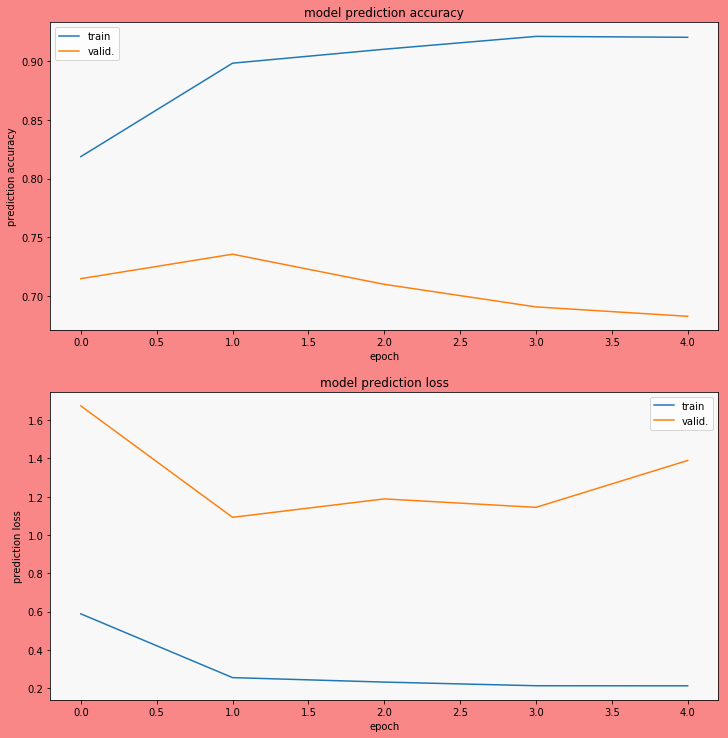

In [47]:
displaytrainingprogress(fit_history.history['acc'], fit_history.history['val_acc'], 'prediction accuracy', 211)
displaytrainingprogress(fit_history.history['loss'], fit_history.history['val_loss'], 'prediction loss', 212)

In [35]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

Loss: 2.1048754609464524
Accuracy: 0.6875


In [36]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [37]:
#Gpredict all data
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = final_model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)

predict

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [38]:
#show actuall classes
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

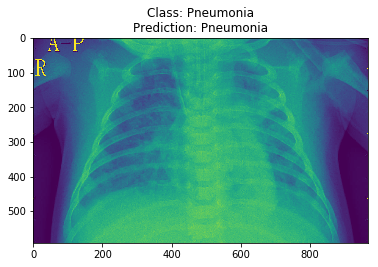

In [41]:
#display the predictions 1
filename = "chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg" 

img = image.load_img(filename, 
                     target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
actual="Normal" if "NORMAL" in filename else "Pneumonia" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Class: ", actual, "\n", "Prediction: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)



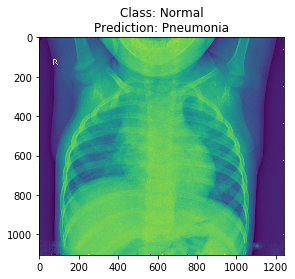

In [43]:
#display the predictions 2
filename = "chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg" 

img = image.load_img(filename, 
                     target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
actual="Normal" if "NORMAL" in filename else "Pneumonia" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Class: ", actual, "\n", "Prediction: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)




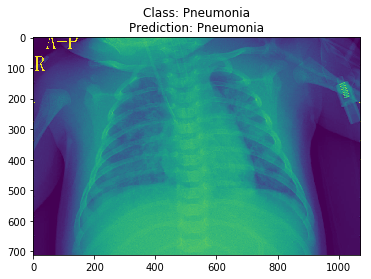

In [44]:
#display the predictions 3
filename = "chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg" 

img = image.load_img(filename, 
                     target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
actual="Normal" if "NORMAL" in filename else "Pneumonia" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Class: ", actual, "\n", "Prediction: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)




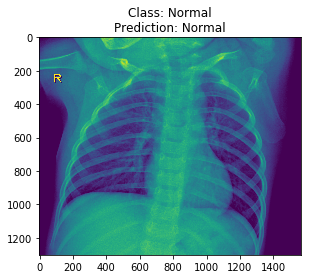

In [45]:
#display the predictions 4
filename = "chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg" 
img = image.load_img(filename, 
                     target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
actual="Normal" if "NORMAL" in filename else "Pneumonia" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Class: ", actual, "\n", "Prediction: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)





## the model has a very low prediction accurcy. it has not been finetuned as this is just prove of concept excercise. the model accuracy could be imporoved by increasing number of epochs or trying different loss function or activation function or the optimiser. the model has 10% difference between training and validation therefore it has been overfitted. increasing the number of data points and adding drop out layers and limiting the weifghts could potentially reduce the overfittig